## Compare portfolio theories
Here we use shares price history to compare various portfolio allocation theories.
Main idea is to compare different ways to get portfolio:
  * Markovitz optimal portfolio (max Sharpie portfolio)
  * Using Ledoit Wolf caovariance shrinkage
  * Minimal volatility portfolio
  * Market capitalization-weighted portfolio
  * Hierarchical Risk Parity

import necessary libs

In [1]:
import numpy as np
import tqdm
import pandas as pd
import datetime
import importlib

In [2]:
from pypoanal import portfolio_calculators
from pypoanal import dataloader
from pypoanal import backtester

Use plotly backend for drawing charts

In [3]:
%matplotlib widget
pd.options.plotting.backend = "plotly"

## Load the data

Randomly select 50 tickers from ``info/shares_outstanding.csv`` file

In [4]:
tickers_list = np.array(dataloader.load_random_saved_tickers(sample_size=200))
tickers_list

array(['OFIX', 'BVS', 'AKTX', 'SIBN', 'SM', 'ITRM', 'STRA', 'HNRG',
       'XXII', 'TESS', 'CPE', 'LDP', 'SBNY', 'MGTX', 'PACW', 'STRN',
       'PEY', 'ENS', 'PENN', 'HSBC', 'VCSA', 'WD', 'TAP', 'AIRTP', 'STT',
       'BILI', 'RVAC', 'SBFM', 'NGS', 'UONEK', 'BLIN', 'EXG', 'RYN',
       'AIKI', 'PLTK', 'ZD', 'PTEN', 'BTRS', 'ARGU', 'WBS', 'ICCC',
       'CYCN', 'NYXH', 'DXYN', 'MUDSU', 'DWSN', 'PAR', 'NXN', 'LVO',
       'SND', 'PWR', 'SNP', 'CDXS', 'BKNG', 'CODX', 'AADI', 'TYRA', 'PEI',
       'EOI', 'ATAI', 'HOLI', 'SDGR', 'RXRX', 'PII', 'NLIT', 'RGLD',
       'SAIA', 'ALPA', 'NS', 'CHW', 'CMG', 'TCDA', 'ECOL', 'ANDE', 'RLAY',
       'LILAK', 'CAR', 'ATR', 'ENTX', 'TRUE', 'CDK', 'XCUR', 'GNAC',
       'CPB', 'ITHX', 'MGIC', 'DAL', 'MCY', 'SMTI', 'SGMS', 'NSSC', 'MAS',
       'BRQS', 'NBST', 'KVSC', 'AWK', 'AVB', 'EQ', 'HII', 'CMCO', 'SPCB',
       'SGTX', 'KXIN', 'SANM', 'CTIC', 'RNER', 'WERN', 'DTEA', 'JUGG',
       'BWC', 'ACOR', 'TIPT', 'VTYX', 'SWX', 'FNWB', 'EHTH', 'CSPI',
      

Load price and volume history for selected tickers

In [5]:
shares_history = dataloader.load_shares_history(tickers_list)

Loading price and volume: 100%|█████████████████████████████████████████████████████████████████████████| 200/200 [00:14<00:00, 13.97it/s]


## Backtest Performance

Select various ways to create a portfolio from given shares

In [6]:
calculators = {
    # 'max_sharpe': portfolio_calculators.compute_sharpie_weights,
    'HRP': portfolio_calculators.compute_hrp_weights,
    # 'exp_cov': portfolio_calculators.compute_expcov_weights,
    # 'equal': portfolio_calculators.compute_equal_weights,
    'MCAP': portfolio_calculators.compute_mcap_weights,
    'ledoitw_cov': portfolio_calculators.compute_ledoitw_weights
}

We allocate portfolio according to one of the algorithms. Then, portfolio is rebalanced every **rebalance_period** days (e.g. annually).
As a result we get history of allocated portfolios, fees, and portfolio values is USD.
All of that is done in **compare_calculators_for_periodic_rebalance** method.
Here *backtesting* means testing the trategy back in time (using hitorical data). 

In [7]:
backtest_start_date = datetime.date(2006, 8, 8)
backtest_end_date = datetime.date(2021, 12, 12)
rebalance_period = datetime.timedelta(days=360)
rebalance_dates = backtester.compute_rebalance_dates(backtest_start_date,backtest_end_date,rebalance_period)
importlib.reload(backtester)

values_history_per_calc, fees_history_per_calc, portfolio_history_per_calc = backtester.compare_calculators_for_periodic_rebalance(calculators,
                                                                                                                  tickers_list,
                                                                                                                  10**4,
                                                                                                                  rebalance_dates,
                                                                                                                  shares_history=shares_history)

HRP


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.18it/s]


MCAP


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 12.49it/s]


ledoitw_cov


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.48it/s]


How did the value of the annually rebalanced market-cap weighted portfolio value changed over time:

In [8]:
values_history_per_calc['MCAP'].head()

2006-08-08    10000.000000
2007-08-03     9996.010764
2008-07-28     9346.192127
2009-07-23     6582.196055
2010-07-18     6157.686657
Name: MCAP, dtype: float64

How did the rebalance fees of the annually rebalanced market-cap weighted portfolio value changed over time:

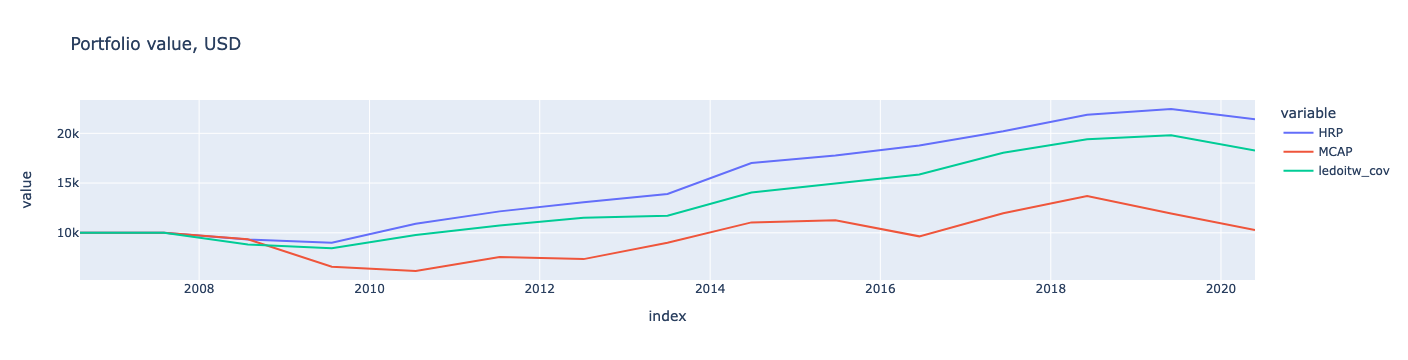

In [9]:
values_history_per_calc.plot(title=f'Portfolio value, USD')

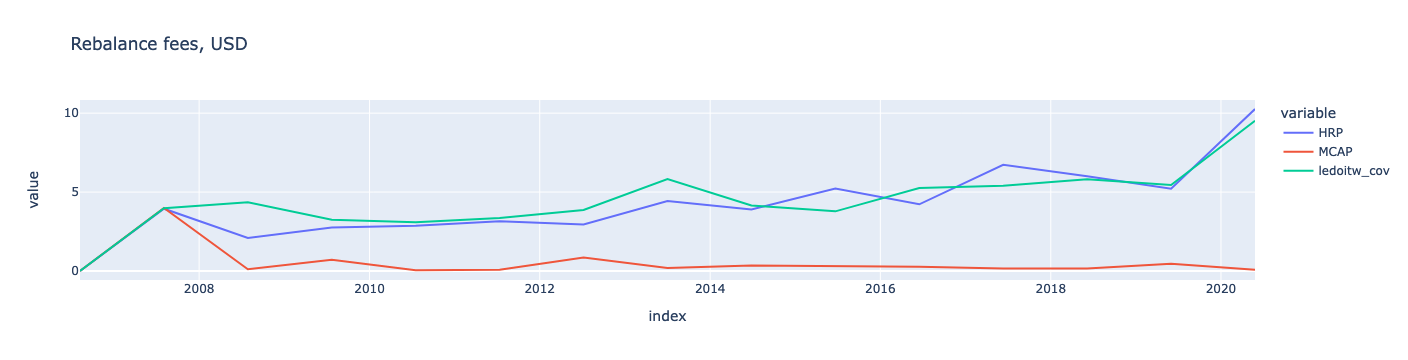

In [10]:
fees_history_per_calc.plot(title=f'Rebalance fees, USD')

##  Backtests varying start date
Now we can test how the date we start the backtest from affects the results

In [11]:
calculators = {
    # 'max_sharpe': portfolio_calculators.compute_sharpie_weights,
    'HRP': portfolio_calculators.compute_hrp_weights,
    # 'exp_cov': portfolio_calculators.compute_expcov_weights,
    # 'equal': portfolio_calculators.compute_equal_weights,
    'MCAP': portfolio_calculators.compute_mcap_weights,
    'ledoitw_cov': portfolio_calculators.compute_ledoitw_weights
}

In [12]:
from random import randint
importlib.reload(backtester)
backtest_start_date = datetime.date(2010, 8, 8)
backtest_end_date = datetime.date(2022, 1, 15)
rebalance_period = datetime.timedelta(days=360)
num_starting_dates = 40
initial_cash = 10 ** 6
start_days_delta = list(sorted(set(randint(-4*365, 4*365) for k in range(num_starting_dates))))
start_dates = [backtest_start_date+datetime.timedelta(days=days) for days in start_days_delta]
# start_dates = [datetime.date(2009,5,10)]
stats: dict[pd.DataFrame] = dict()
for calc_name, calculate_weights in calculators.items():
    start_to_end_values_df = pd.DataFrame()
    for start_date in tqdm.tqdm(start_dates,desc=calc_name,disable=False):
        rebalance_dates = backtester.compute_rebalance_dates(start_date,backtest_end_date,rebalance_period)
        portfolio_history, _ = backtester.reallocate_portfolio_periodically(calculate_weights,
                                                                            rebalance_dates,
                                                                            initial_cash,
                                                                            fees_percent=0.04,
                                                                            shares_history=shares_history,
                                                                            progress_bar=False)
        values_history: list[np.float64] = backtester.portfolios_values_history(list(zip(rebalance_dates,portfolio_history)),
                                                                                shares_history.price_history)
        values_history_dataframe = pd.DataFrame({str(start_date):values_history},index=rebalance_dates)
        start_to_end_values_df = start_to_end_values_df.join(values_history_dataframe,how='outer')
    stats[calc_name] = start_to_end_values_df

ledoitw_cov: 100%|████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:43<00:00,  1.15s/it]


In [13]:
stats.keys()

dict_keys(['HRP', 'MCAP', 'ledoitw_cov'])

stats is a dict of dataframes. Column of each dataframe correspond to start date, rows correspond to next reallocation date.

In [14]:
stats['ledoitw_cov'].head()

2006-08-29  2006-09-11  2006-09-15  2006-12-25  2007-02-07  \
2006-08-29   1000000.0         NaN         NaN         NaN         NaN   
2006-09-11         NaN   1000000.0         NaN         NaN         NaN   
2006-09-15         NaN         NaN   1000000.0         NaN         NaN   
2006-12-25         NaN         NaN         NaN   1000000.0         NaN   
2007-02-07         NaN         NaN         NaN         NaN   1000000.0   

            2007-07-31  2007-11-01  2007-11-22  2007-12-27  2007-12-30  ...  \
2006-08-29         NaN         NaN         NaN         NaN         NaN  ...   
2006-09-11         NaN         NaN         NaN         NaN         NaN  ...   
2006-09-15         NaN         NaN         NaN         NaN         NaN  ...   
2006-12-25         NaN         NaN         NaN         NaN         NaN  ...   
2007-02-07         NaN         NaN         NaN         NaN         NaN  ...   

            2012-08-23  2012-08-31  2012-10-27  2012-11-16  2012-12-05  \
2006-08-29         NaN         NaN         NaN         NaN         NaN   
2006-09-11         NaN         NaN         NaN         NaN         NaN   
2006-09-15         NaN         NaN         NaN         NaN         NaN   
2006-12-25         NaN         NaN         NaN         NaN         NaN   
2007-02-07         NaN         NaN         NaN         NaN         NaN   

            2013-03-30  2013-06-01  2013-12-17  2013-12-22  2014-08-02  
2006-08-29         NaN         NaN         NaN         NaN         NaN  
2006-09-11         NaN         NaN         NaN         NaN         NaN  
2006-09-15         NaN         NaN         NaN         NaN         NaN  
2006-12-25         NaN         NaN         NaN         NaN         NaN  
2007-02-07         NaN         NaN         NaN         NaN         NaN  

[5 rows x 38 columns]

A-ha! Not trivial...

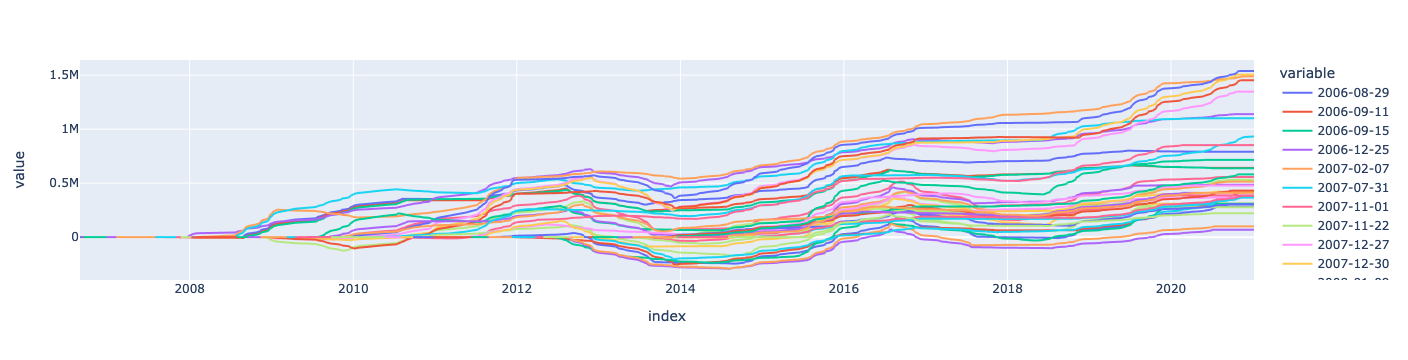

In [15]:
(stats['ledoitw_cov']-stats['MCAP']).interpolate().plot()

Comparing HRP results to marcet-cap weighted portfolios

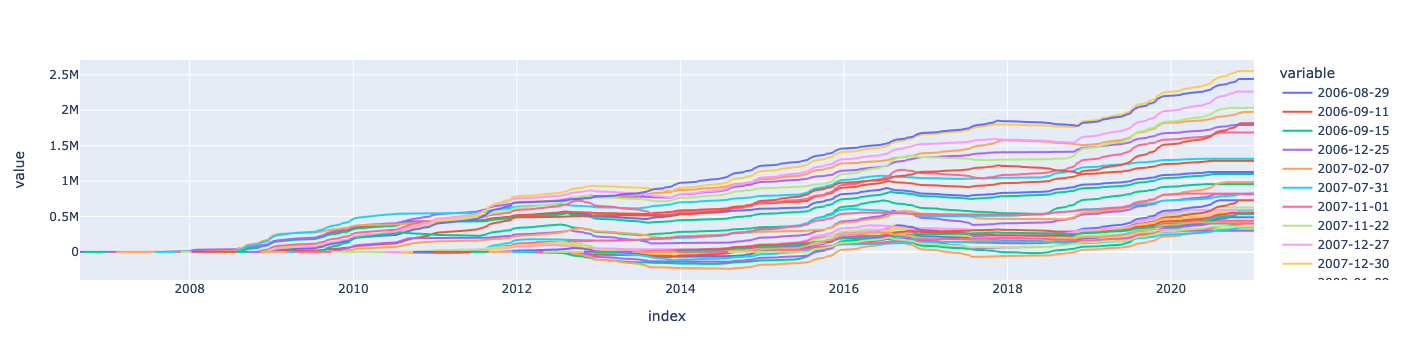

In [16]:
(stats['HRP']-stats['MCAP']).interpolate().plot()

Note, that portolios bought before the 2008 financial crysis performed much better, yielding significantly higher returns.

Consider distribution of portfolio values compared to MCAP. Start date is randomized.

In [17]:
import plotly.express as px
mcap_diff = pd.DataFrame()
mcap_diff['ledoitw_cov'] = (stats['ledoitw_cov']-stats['MCAP']).interpolate().iloc[-1]
mcap_diff['HRP'] = (stats['ledoitw_cov']-stats['HRP']).interpolate().iloc[-1]

In [18]:
mcap_diff.describe()

ledoitw_cov           HRP
count  3.800000e+01  3.800000e+01
mean   6.168399e+05 -3.277203e+05
std    4.096025e+05  3.665731e+05
min    6.880890e+04 -1.503191e+06
25%    3.660768e+05 -4.573406e+05
50%    4.535037e+05 -2.184653e+05
75%    7.714616e+05 -9.835516e+04
max    1.538069e+06  1.106330e+05

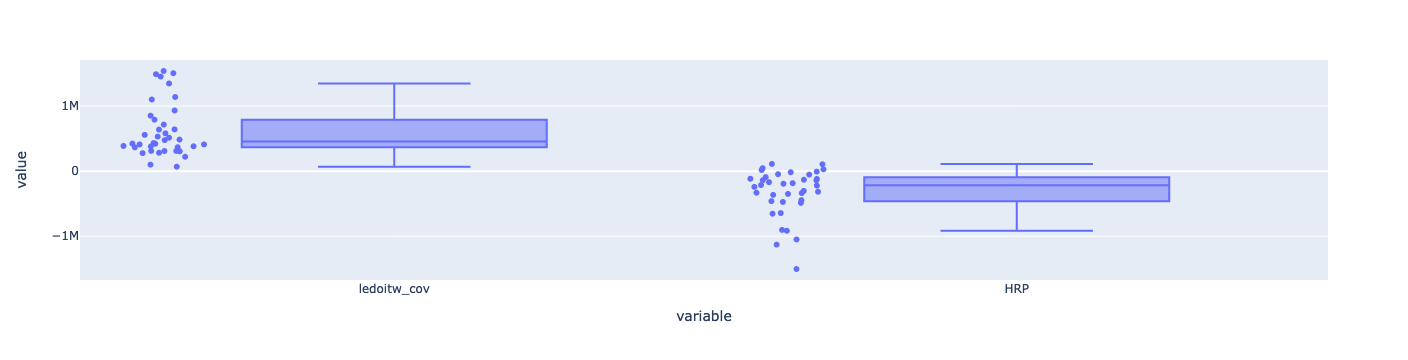

In [19]:
px.box(mcap_diff, y=['ledoitw_cov','HRP'], points='all')

Remove outliers

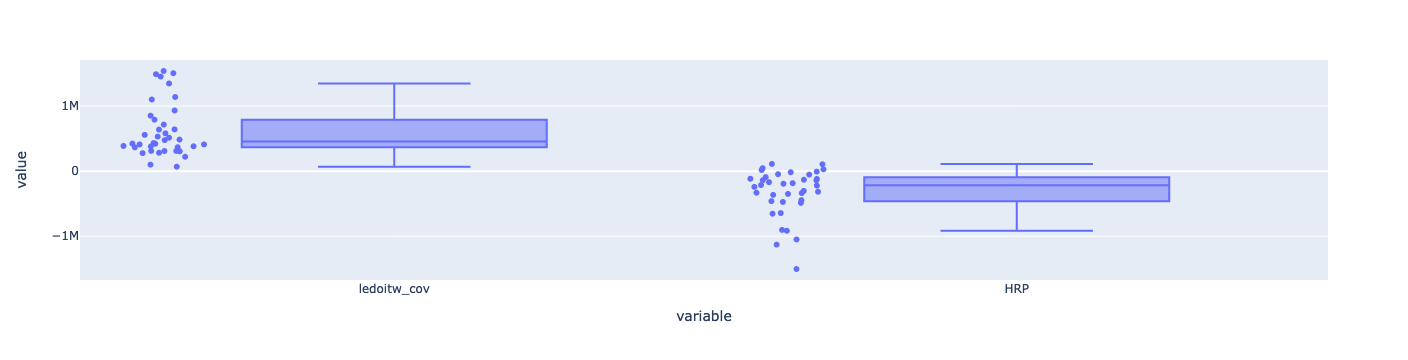

In [20]:
mcap_diff=mcap_diff[(mcap_diff>-2000_000) & (mcap_diff<2000_000)].dropna()
px.box(mcap_diff, y=['ledoitw_cov','HRP'], points='all')

Are they normally distributed? Let's apply Shapiro-Wilk test

In [21]:
import scipy.stats as st
st.shapiro(mcap_diff['ledoitw_cov']).pvalue, st.shapiro(mcap_diff['HRP']).pvalue

(0.00011452466424088925, 0.0003306306025478989)

95% Confidence interval for means

In [22]:
# returns confidence interval of mean
def conf_int_mean(a, conf=0.95):
    mu, sem, m = np.mean(a), st.sem(a), st.t.ppf((1+conf)/2., len(a)-1)
    return mu - m*sem, mu + m*sem

In [23]:
conf_int_mean(mcap_diff['ledoitw_cov']), conf_int_mean(mcap_diff['HRP'])

((482206.87733038, 751472.8813764052),
 (-448209.93047044927, -207230.75852196536))